In [ ]:
# Name : Dhnalakshmi C V

# Student ID : A00252813

In [ ]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
#Reading the csv file
df = pd.read_csv("/content/drive/MyDrive/ANA-1005/AA2/airquality.csv")

In [ ]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9,26
149,NaN,145.0,13.2,77.0,9,27
150,14.0,191.0,14.3,75.0,9,28
151,18.0,131.0,8.0,76.0,9,29


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Question 1A
#a. How many missing values are present for each variable?
# finding number of null in the each variable of the dataset
df.isnull().sum()

Ozone      37
Solar.R     7
Wind       16
Temp        5
Month       0
Day         0
dtype: int64

In [ ]:
# Question 1B
#Create a data frame of complete cases and find the mean temperature using listwise deletion

#removing null
df_clean= df.dropna()

df_clean


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
6,23.0,299.0,8.6,65.0,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63.0,9,25
148,30.0,193.0,6.9,70.0,9,26
150,14.0,191.0,14.3,75.0,9,28
151,18.0,131.0,8.0,76.0,9,29


In [ ]:
#calculating mean temperature

dftemp_mean=round(df_clean["Temp"].mean(),3)
print(f"The mean temperature is : {dftemp_mean}")

The mean temperature is : 77.99


In [ ]:
# Question 1c
#Find the mean temperature using pairwise deletion

mtpairwise= df["Temp"].mean(skipna=True)
print(f"{round(mtpairwise,2)} is the Mean temperature of pairwise deletion")


77.91 is the Mean temperature of pairwise deletion


In [ ]:
#Question 1d
#Finding missing temperature records

In [ ]:
nulltemp= df[df["Temp"].isna()==True].index.to_numpy()

nulltemp

array([  8,  60,  81,  89, 145])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


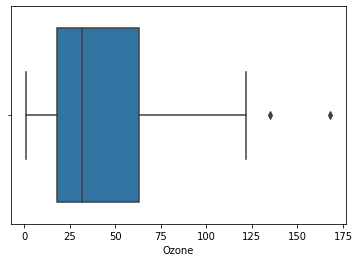

In [54]:
#Question 1e
#Create a box plot for the air quality data. Interpret the plot to explain why there are differences in the mean temperature.

#creating boxplot
sns.boxplot(df["Ozone"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


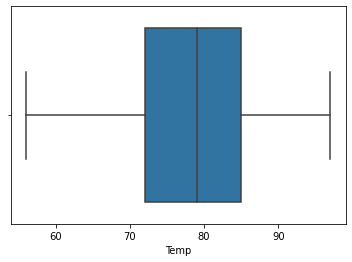

In [55]:
#creating boxplot of Temp Variable
sns.boxplot(df["Temp"])

# From the box plot of Temp, 70 % of the temperature values fall under the first quartile , mean is almost near to median.
# third quatile is the shortest one because there are only few records having ythe temperature range from 80-85
#right tail is shorter than the left one because  approximatelt  less than 25 % records are having temperature values above 85

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


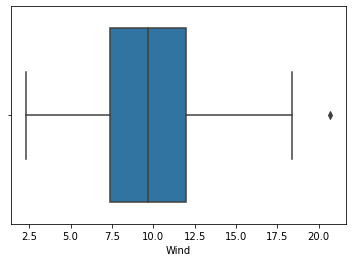

In [56]:
#creating boxplot Wind
sns.boxplot(df["Wind"])

In [ ]:
# From the boxplot the  the maximum temperature

In [49]:
#Question 1f
#How many of the ozone values are outliers (using the default 1.5 IQR setting)? 
#What are the ozone outlier values? Create a new data frame called ozone_complete that has all rows with ozone outliers removed.


q1,q3 = np.nanpercentile(df["Ozone"],[25,75])
iqr=q3-q1

lower_lim = q1-1.5*iqr
upper_lim = q3 + 1.5*iqr

In [ ]:
#Calculating the outliers

outliers = df[(df["Ozone"]<lower_lim)|(df["Ozone"]>upper_lim)]


outliers_index = df[(df["Ozone"]<lower_lim)|(df["Ozone"]>upper_lim)].index



In [ ]:
outliers

,Ozone,Solar.R,Wind,Temp,Month,Day
61,135.0,269.0,4.1,84.0,7,1
116,168.0,238.0,NaN,81.0,8,25


In [ ]:
outliers_index 

# There are two outliers in ozone variable

Int64Index([61, 116], dtype='int64')

In [ ]:
# Creating the ozone_complete

ozone_complete = df.drop(outliers_index)
#Analysing the two data 
df.info()
ozone_complete.info()

In [ ]:
#The outliers has been eliminated from the dataframe and now instead of 153 records now we have 151)


In [ ]:
#Question 2A
air_median = df.copy() # creating a dataframe  from "df"

In [ ]:
median_solar = np.nanmedian(air_median["Solar.R"]) #calculating median

air_median["Solar.R"]=air_median["Solar.R"].replace(np.NaN,median_solar) # filling the null values with median values

air_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     137 non-null    float64
 3   Temp     148 non-null    float64
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.3 KB


In [ ]:
#Question 2B
#Create a new data set called air_mean from the air_median data set. Impute the missing temperature values with the mean temperature for the month that the temperature is
#missing from in the air_mean data set. For example, impute missing month 5


air_mean = air_median.copy()# creates a copy of air_median data frame
air_mean

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,205.0,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9,26
149,NaN,145.0,13.2,77.0,9,27
150,14.0,191.0,14.3,75.0,9,28
151,18.0,131.0,8.0,76.0,9,29


In [ ]:
mean_temp = air_mean["Temp"].mean(skipna=True)# calculates mean while skipping he NaN values

air_mean["Temp"]=air_mean["Temp"].replace(np.NaN,mean_temp) # filling null values with the mean values

air_mean.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     137 non-null    float64
 3   Temp     153 non-null    float64
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.3 KB


In [ ]:
#Question 2C
#Create a new data set called air_ratio from the air_mean data set. Impute the missing values of the Ozone variable using ratio imputation in the air_ratio data set

air_ratio = air_median.copy() # creating  dataset air_ratio from air median

In [ ]:
air_ratio.isnull().sum()

Ozone      37
Solar.R     0
Wind       16
Temp        5
Month       0
Day         0
dtype: int64

In [ ]:
# identify the variable with the highest correlation with air_ratio
air_ratio.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.343494,-0.601291,0.696368,0.164519,-0.013226
Solar.R,0.343494,1.000000,-0.017791,0.237677,-0.077812,-0.152965
Wind,-0.601291,-0.017791,1.000000,-0.465593,-0.184129,0.096955
Temp,0.696368,0.237677,-0.465593,1.000000,0.416108,-0.159548
Month,0.164519,-0.077812,-0.184129,0.416108,1.000000,-0.007962
Day,-0.013226,-0.152965,0.096955,-0.159548,-0.007962,1.000000


In [34]:
# Ratio of Ozone to Temp
ratio = air_ratio["Ozone"].sum() / air_ratio["Temp"].sum()
ratio



0.4238140664296245

In [38]:
# Ratio imputation method 
air_ratio["Ozone"] = air_ratio["Ozone"].fillna(ratio * air_ratio["Temp"])


In [39]:
air_ratio.isnull().sum()

Ozone       1
Solar.R     0
Wind       16
Temp        5
Month       0
Day         0
dtype: int64

In [ ]:
#Question 2d
#Create a new data set called air_complete from the air_ratio data set. Use linear regression to impute the missing values of Wind using Ozone as the independent
#variable in the air_complete data set.

air_complete = air_ratio.copy()



In [ ]:
air_complete.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,205.0,14.3,56.0,5,5


In [40]:
# Creating a dataframe for imputation
dfimpute = air_complete[['Wind','Ozone']]


In [41]:
# Preforming linear regration imputation to data frame
imp = IterativeImputer(max_iter=10, random_state=0) 


imp.fit(dfimpute)

imputed=imp.transform(dfimpute) # Transforming



In [42]:
#Converting stage

df_impute=pd.DataFrame(imputed) 

df_impute.columns=[['Wind','Ozone']] 

In [43]:
# Replacing the imputed values 
air_complete[['Wind', 'Ozone']] = df_impute[['Wind', 'Ozone']]
air_complete.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.000000,190.0,7.400000,67.0,5,1
1,36.000000,118.0,8.000000,72.0,5,2
2,12.000000,149.0,12.600000,74.0,5,3
3,18.000000,313.0,11.500000,62.0,5,4
4,14.944354,205.0,14.300000,56.0,5,5
5,28.000000,205.0,14.900000,66.0,5,6
6,23.000000,299.0,8.600000,65.0,5,7
7,19.000000,99.0,13.800000,59.0,5,8
8,8.000000,19.0,12.594846,NaN,5,9
9,49.580065,194.0,8.600000,69.0,5,10


In [48]:
air_complete.round(1)



air_complete

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.000000,190.0,7.4,67.0,5,1
1,36.000000,118.0,8.0,72.0,5,2
2,12.000000,149.0,12.6,74.0,5,3
3,18.000000,313.0,11.5,62.0,5,4
4,14.944354,205.0,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.000000,193.0,6.9,70.0,9,26
149,21.628438,145.0,13.2,77.0,9,27
150,14.000000,191.0,14.3,75.0,9,28
151,18.000000,131.0,8.0,76.0,9,29


In [46]:
df['Ozone'].apply(np.floor)   # Rounding the ozone variable

0      41.0
1      36.0
2      12.0
3      18.0
4       NaN
       ... 
148    30.0
149     NaN
150    14.0
151    18.0
152    20.0
Name: Ozone, Length: 153, dtype: float64

In [47]:
air_complete.isnull().sum() # recheking missing values

Ozone      0
Solar.R    0
Wind       0
Temp       5
Month      0
Day        0
dtype: int64